In [15]:
import pandas as pd
import os
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
os.getcwd()

'C:\\Users\\steph\\Desktop\\Validere'

In [4]:
# Sample profiles
profiles = pd.ExcelFile('Distillation Profiles.xlsx')
df0 = profiles.parse(profiles.sheet_names[0])
df1 = profiles.parse(profiles.sheet_names[1])
df2 = profiles.parse(profiles.sheet_names[2])
df3 = profiles.parse(profiles.sheet_names[3])
df4 = profiles.parse(profiles.sheet_names[4])
df5 = profiles.parse(profiles.sheet_names[5])

In [5]:
df_input = pd.DataFrame([ 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 95, 99], columns = ['%'])

In [48]:
data = df1.dropna(axis=0,how='any')
reg = LinearRegression().fit(data[['%']], data[['Temperature']])
df_output = pd.DataFrame(reg.predict(df_input), columns = ['Temperature'])
profile = pd.concat([df_input, df_output], axis=1, join='inner')
profile

,%,Temperature
0,5,56.961248
1,10,73.535654
2,20,106.684466
3,30,139.833278
4,40,172.982090
5,50,206.130902
6,60,239.279714
7,70,272.428526
8,80,305.577338
9,90,338.726150


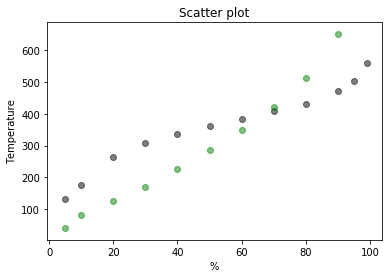

In [55]:
# Plot
plt.scatter(df0[['%']], df0[['Temperature']], alpha=0.5, color='k')
plt.scatter(df3[['%']], df3[['Temperature']], alpha=0.5, color='g')
plt.title('Scatter plot')
plt.xlabel('%')
plt.ylabel('Temperature')
plt.show()

In [52]:
# Input
df_input = pd.DataFrame([ 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 95, 99], columns = ['%'])

# Main function
def create_profile_blend(profile1, vol1, profile2, vol2):
    p1 = profile1.dropna(axis=0,how='any')
    reg1 = LinearRegression().fit(p1[['%']], p1[['Temperature']])
    df_out1 = pd.DataFrame(reg1.predict(df_input), columns = ['Temperature'])
    p2 = profile2.dropna(axis=0,how='any')
    reg2 = LinearRegression().fit(p2[['%']], p2[['Temperature']])
    df_out2 = pd.DataFrame(reg2.predict(df_input), columns = ['Temperature'])
    
    return(pd.concat([df_input, (vol1*df_out1) + (vol2*df_out2)], axis=1, join='inner'))
    

In [56]:
# Sample result
create_profile_blend(df0,0.4,df3,0.6)

,%,Temperature
0,5,82.550572
1,10,109.855252
2,20,164.464614
3,30,219.073975
4,40,273.683336
5,50,328.292697
6,60,382.902059
7,70,437.511420
8,80,492.120781
9,90,546.730143


In [ ]:
create_profile_blend(profile1, vol1, profile2, vol2)